# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
(The graph Latitude VS Max Temperature support the Analysis above.)
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
(The graph Latitude VS Cloudiness support the Analysis above.)
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.
(The graph Latitude VS wind speed support the Analysis above.)
---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import openweathermapy as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Importing each City's weather info using the Open Weather API Wrapper methods and store them into the Weather_data list. 
#Also display a msg wather if the API call was successful or not.
settings = {"unites": "metric", "appid": api_key}
weather_data = []
print("Beginning Data Retrieval")
print("------------------------")
for city in cities:
    try:
        current_city = ow.get_current(city, **settings)
        weather_data.append(current_city)
        print(str(cities.index(city)) +" - " + city + " : City record has been processed")
    except:
        print(str(cities.index(city)) +" - " + city + ": CITY RECORD WAS NOT FOUND!!")

Beginning Data Retrieval
------------------------
0 - barentsburg: CITY RECORD WAS NOT FOUND!!
1 - port alfred : City record has been processed
2 - manokwari : City record has been processed
3 - ribeira grande : City record has been processed
4 - cape town : City record has been processed
5 - acarau: CITY RECORD WAS NOT FOUND!!
6 - punta arenas : City record has been processed
7 - pichayevo : City record has been processed
8 - mahebourg : City record has been processed
9 - brae : City record has been processed
10 - arraial do cabo : City record has been processed
11 - belovo : City record has been processed
12 - dondo : City record has been processed
13 - bredasdorp : City record has been processed
14 - kitimat : City record has been processed
15 - chichester : City record has been processed
16 - ushuaia : City record has been processed
17 - alenquer : City record has been processed
18 - illoqqortoormiut: CITY RECORD WAS NOT FOUND!!
19 - busselton : City record has been processed
20 - 

174 - sept-iles : City record has been processed
175 - jiangyou : City record has been processed
176 - port moresby : City record has been processed
177 - tsihombe: CITY RECORD WAS NOT FOUND!!
178 - nara : City record has been processed
179 - mersing : City record has been processed
180 - kodiak : City record has been processed
181 - manturovo : City record has been processed
182 - constitucion : City record has been processed
183 - bom jardim : City record has been processed
184 - dwarka : City record has been processed
185 - belcista : City record has been processed
186 - portsmouth : City record has been processed
187 - liancheng : City record has been processed
188 - takahata : City record has been processed
189 - flinders : City record has been processed
190 - saint-jean-de-la-ruelle : City record has been processed
191 - ballina : City record has been processed
192 - yar-sale : City record has been processed
193 - hasaki : City record has been processed
194 - samarai : City recor

345 - chenghai : City record has been processed
346 - alghero : City record has been processed
347 - white oak : City record has been processed
348 - jiangyin : City record has been processed
349 - himora: CITY RECORD WAS NOT FOUND!!
350 - mehamn : City record has been processed
351 - tocopilla : City record has been processed
352 - uyovu : City record has been processed
353 - fort saint john: CITY RECORD WAS NOT FOUND!!
354 - kamenskoye: CITY RECORD WAS NOT FOUND!!
355 - carlisle : City record has been processed
356 - sirur : City record has been processed
357 - kamiiso : City record has been processed
358 - hami : City record has been processed
359 - cedar city : City record has been processed
360 - marshfield : City record has been processed
361 - san cristobal : City record has been processed
362 - alta floresta : City record has been processed
363 - sao filipe : City record has been processed
364 - clyde river : City record has been processed
365 - makakilo city : City record has 

518 - baiyin : City record has been processed
519 - hirara : City record has been processed
520 - zhanaozen : City record has been processed
521 - kampene : City record has been processed
522 - kavieng : City record has been processed
523 - karratha : City record has been processed
524 - yomitan: CITY RECORD WAS NOT FOUND!!
525 - kita : City record has been processed
526 - sobolevo : City record has been processed
527 - paamiut : City record has been processed
528 - dabakala : City record has been processed
529 - labuhan : City record has been processed
530 - scottsbluff : City record has been processed
531 - nemuro : City record has been processed
532 - kamaishi : City record has been processed
533 - mmathubudukwane : City record has been processed
534 - lata : City record has been processed
535 - soyo : City record has been processed
536 - sangmelima : City record has been processed
537 - magaria : City record has been processed
538 - kimbe : City record has been processed
539 - turi

In [5]:
#testing to make sure the weather_data list has information in it.
weather_data

[{'coord': {'lon': 26.89, 'lat': -33.59},
  'weather': [{'id': 500,
    'main': 'Rain',
    'description': 'light rain',
    'icon': '10d'}],
  'base': 'stations',
  'main': {'temp': 293.025,
   'pressure': 1012,
   'humidity': 100,
   'temp_min': 293.025,
   'temp_max': 293.025,
   'sea_level': 1020.71,
   'grnd_level': 1012},
  'wind': {'speed': 4.22, 'deg': 217.5},
  'rain': {'3h': 1.365},
  'clouds': {'all': 92},
  'dt': 1543298627,
  'sys': {'message': 0.011,
   'country': 'ZA',
   'sunrise': 1543287362,
   'sunset': 1543338270},
  'id': 964432,
  'name': 'Port Alfred',
  'cod': 200},
 {'coord': {'lon': 134.08, 'lat': -0.87},
  'weather': [{'id': 500,
    'main': 'Rain',
    'description': 'light rain',
    'icon': '10d'}],
  'base': 'stations',
  'main': {'temp': 299.3,
   'pressure': 1020.59,
   'humidity': 100,
   'temp_min': 299.3,
   'temp_max': 299.3,
   'sea_level': 1023.18,
   'grnd_level': 1020.59},
  'wind': {'speed': 0.27, 'deg': 48.5001},
  'rain': {'3h': 0.715},
  'cl

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Continue with the Open Weather API Wrapper method to convert the Json info into a DataFrame.
summary = ["name","clouds.all", "sys.country","dt","main.humidity","coord.lat", "coord.lon","main.temp_max","wind.speed"]
column_names = ["City", "Cloudiness","Country","Date","Humidity","Latitude","Lng","Max Temp","Wind Speed"]
data = [response(*summary) for response in weather_data]

weather_data1 = pd.DataFrame(data, columns=column_names)
weather_data1

,City,Cloudiness,Country,Date,Humidity,Latitude,Lng,Max Temp,Wind Speed
0,Port Alfred,92,ZA,1543298627,100,-33.59,26.89,293.025,4.22
1,Manokwari,24,ID,1543298627,100,-0.87,134.08,299.300,0.27
2,Ribeira Grande,92,PT,1543298627,92,38.52,-28.70,292.850,19.42
3,Cape Town,75,ZA,1543294800,77,-33.93,18.42,289.150,8.70
4,Punta Arenas,20,CL,1543294800,87,-53.16,-70.91,280.150,3.60
5,Pichayevo,80,RU,1543298628,93,51.79,41.22,266.175,3.72
6,Mahebourg,75,MU,1543294800,88,-20.41,57.70,299.150,7.20
7,Brae,36,GB,1543296000,93,60.40,-1.35,278.150,3.60
8,Arraial do Cabo,92,BR,1543298628,100,-22.97,-42.02,295.200,4.77
9,Belovo,64,RU,1543298427,85,54.42,86.30,263.025,1.92


In [7]:
#testing to validate the DataFrame has the same number of records
weather_data1.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Latitude      543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [8]:
#Exporting the DataFrame into the Output folder as csv file.
weather_data1.to_csv(output_data_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

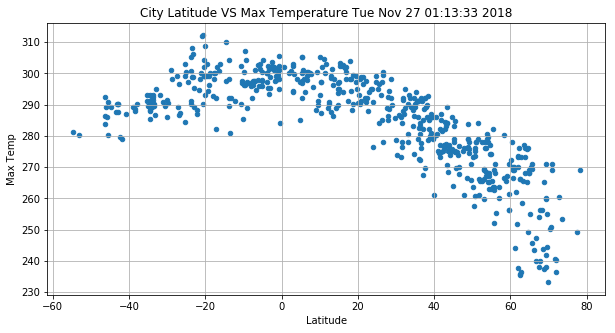

In [9]:
#Plot the Latitude vs. Temperature chart and save it
td = time.asctime()
weather_data1.plot(kind="scatter", x='Latitude', y='Max Temp', grid=True, title=(f"City Latitude VS Max Temperature {td}"), figsize=(10,5))
plt.savefig("Images/LatVsTemp.png")


#### Latitude vs. Humidity Plot

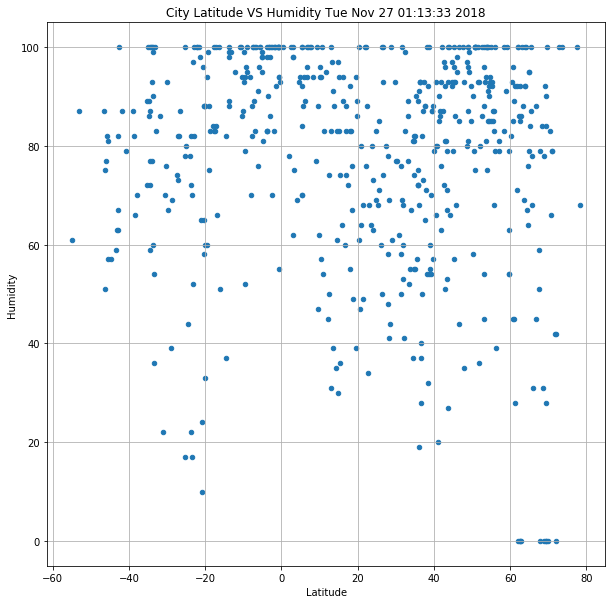

In [10]:
#Plot the Latitude vs. Humidity chart and save it
weather_data1.plot(kind="scatter", x='Latitude', y='Humidity', grid=True, title=(f"City Latitude VS Humidity {td}"), figsize=(10,10))
plt.savefig("Images/LatVsHumidity.png")

#### Latitude vs. Cloudiness Plot

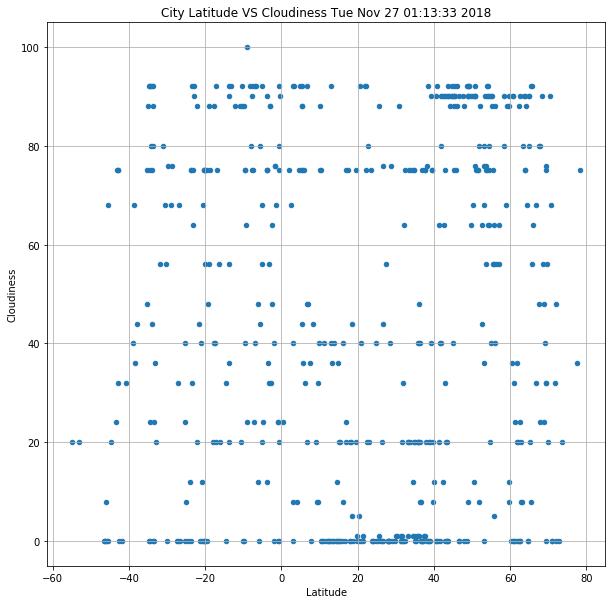

In [11]:
#Plot the Latitude vs. Cloudiness chart and save it
weather_data1.plot(kind="scatter", x='Latitude', y='Cloudiness', grid=True, title=(f"City Latitude VS Cloudiness {td}"), figsize=(10,10))
plt.savefig("Images/LatVsCloud.png")

#### Latitude vs. Wind Speed Plot

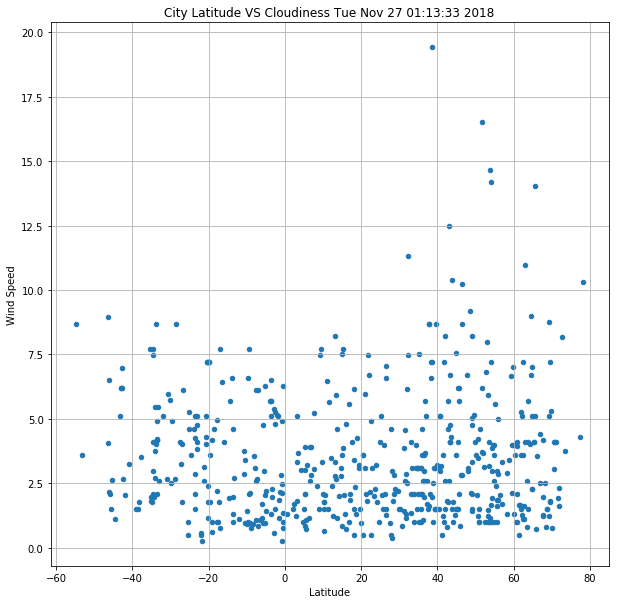

In [12]:
#Plot the Latitude vs. Wind Speed chart and save it
weather_data1.plot(kind="scatter", x='Latitude', y='Wind Speed', grid=True, title=(f"City Latitude VS Cloudiness {td}"), figsize=(10,10))
plt.savefig("Images/LatVsWindSpeed.png")